In [1]:
import PIL as pil
from PIL import Image
import math

**Solution 1**


In [2]:
def get_dominant_color(pil_img):
    img = pil_img.copy()
    img.convert("RGB")
    img = img.resize((1, 1), resample=0)
    dominant_color = img.getpixel((0, 0))
    return dominant_color

In [11]:
img = Image.open(r"/content/drive/MyDrive/1. MajorProject/DATASET/Images/alps.jfif") 
DOMINANT_COLOUR = get_dominant_color(img)
DOMINANT_COLOUR

(177, 202, 224)

**Solution 2**

In [23]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import pandas as pd

In [24]:
def find_dominant_colours(PATH):

  #pil.Image.open(PATH).convert('RGB')
  IMG = img.imread(PATH)
  
  r = []
  g = []
  b = []
  for row in IMG:
      for temp_r, temp_g, temp_b in row:
          r.append(temp_r)
          g.append(temp_g)
          b.append(temp_b)

  IMG_df = pd.DataFrame({'red' : r,
                            'green' : g,
                            'blue' : b})
  
  IMG_df['scaled_color_red'] = whiten(IMG_df['red'])
  IMG_df['scaled_color_blue'] = whiten(IMG_df['blue'])
  IMG_df['scaled_color_green'] = whiten(IMG_df['green'])
  
  cluster_centers, _ = kmeans(IMG_df[['scaled_color_red',
                                      'scaled_color_blue',
                                      'scaled_color_green']], 1)
  
  dominant_colors = []
  
  red_std, green_std, blue_std = IMG_df[['red',
                                            'green',
                                            'blue']].std()
  
  for cluster_center in cluster_centers:
      red_scaled, green_scaled, blue_scaled = cluster_center 
      dominant_colors.append((
          red_scaled * red_std / 255,
          green_scaled * green_std / 255,
          blue_scaled * blue_std / 255
      ))

  plt.imshow([dominant_colors])
  plt.show()
  
  major_colour = []
  for t in dominant_colors[0]:
    major_colour.append(int(t*255))
  

  return dominant_colors, major_colour

In [25]:
def colour_to_emotion(colour):

  blue = [0, 0, 255]
  green = [0, 255, 0]
  red = [255, 0, 0]
  #purple = [255, 0, 255]
  black = [0, 0, 0]
  white = [255, 255, 255]

  emotion = {'blue':['calm', 'happy'], 'green':['natural', 'comfortable'], 'red': ['passionate', 'energized', 'excited'],
                  'white':['pure','clean'], 'black':['fear', 'elegance']}

  find_closest_colour = {(diff(colour, blue)):'blue', (diff(colour, green)):'green', (diff(colour, red)):'red',
                              (diff(colour, white)):'white', (diff(colour, black)):'black'}


  min = 100

  for key, value in find_closest_colour.items():
    if(min>key):
      min = key
    print(value + ": " + str(key))

  print("\nBest Fitting Colour: "+ find_closest_colour.get(min))
  print("\nBest Fitting Emotions: " + ', '.join(map(str, emotion.get(find_closest_colour.get(min)))))

  return emotion.get(find_closest_colour.get(min))

In [26]:
def diff(colour1, colour2):

  val = math.sqrt(((colour1[0]-colour2[0])/255)**2 + ((colour1[1]-colour2[1])/255)**2 + ((colour1[2]-colour2[2])/255)**2)
  return val

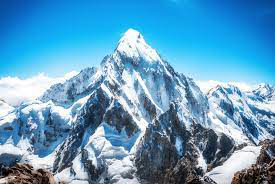

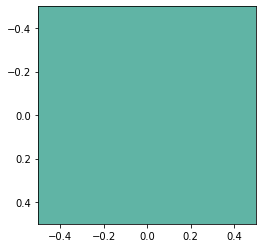

blue: 0.8743954906382141
green: 0.8043136298888099
red: 1.1426915352082898
white: 0.7745073219121312
black: 1.0289242543099402

Best Fitting Colour: white

Best Fitting Emotions: pure, clean


In [31]:
PATH="/content/drive/MyDrive/1. MajorProject/DATASET/Images/alps.jfif"
image = Image.open(r"/content/drive/MyDrive/1. MajorProject/DATASET/Images/alps.jfif") 
display(image)

dominant_colors, major_colour = find_dominant_colours(PATH)
dominant_colors

emotion_list = colour_to_emotion(major_colour)
#emotion_list

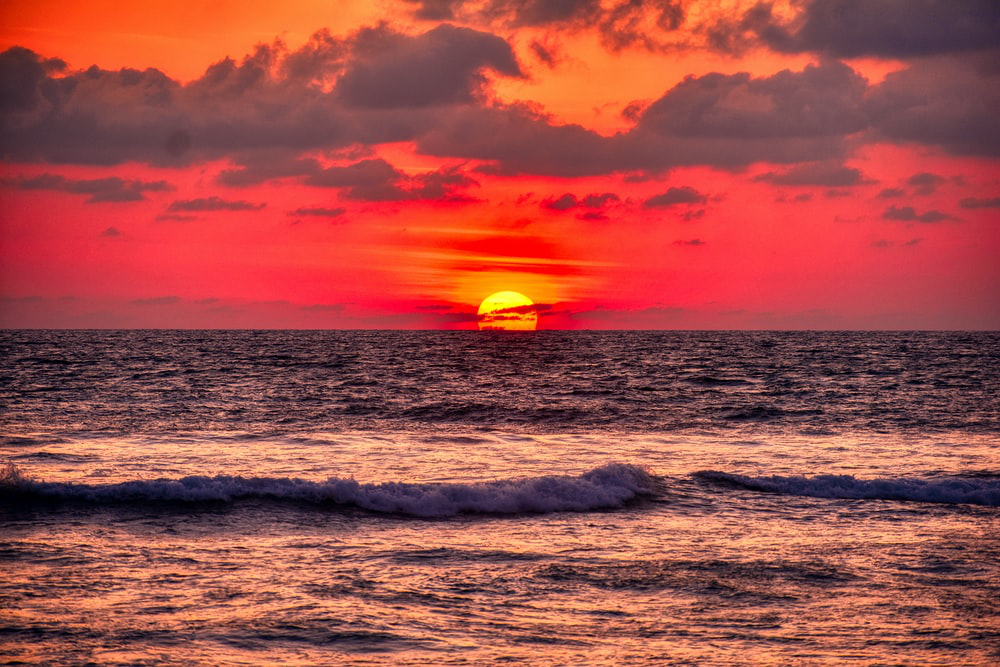

blue: 1.078581094776122
green: 0.9088906843221983
red: 0.5761637171749454
white: 1.0565407490859244
black: 0.7762427869442446

Best Fitting Colour: red

Best Fitting Emotions: passionate, energized, excited


In [35]:
PATH="/content/drive/MyDrive/1. MajorProject/DATASET/Images/sunset_beach.jfif"
image = Image.open(r"/content/drive/MyDrive/1. MajorProject/DATASET/Images/sunset_beach.jfif") 
display(image)

dominant_colors, major_colour = find_dominant_colours(PATH)
dominant_colors

emotion_list = colour_to_emotion(major_colour)
#emotion_list

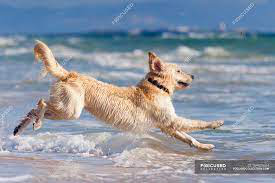

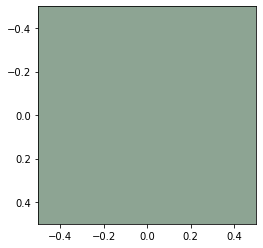

blue: 0.9480224870272148
green: 0.874879021680102
red: 0.9725253001535115
white: 0.7117512017300481
black: 1.0255183140148467

Best Fitting Colour: white

Best Fitting Emotions: pure, clean


In [38]:
PATH="/content/drive/MyDrive/1. MajorProject/DATASET/Images/dog_2.jfif"
image = Image.open(r"/content/drive/MyDrive/1. MajorProject/DATASET/Images/dog_2.jfif") 
display(image)

dominant_colors, major_colour = find_dominant_colours(PATH)
dominant_colors

emotion_list = colour_to_emotion(major_colour)
#emotion_list

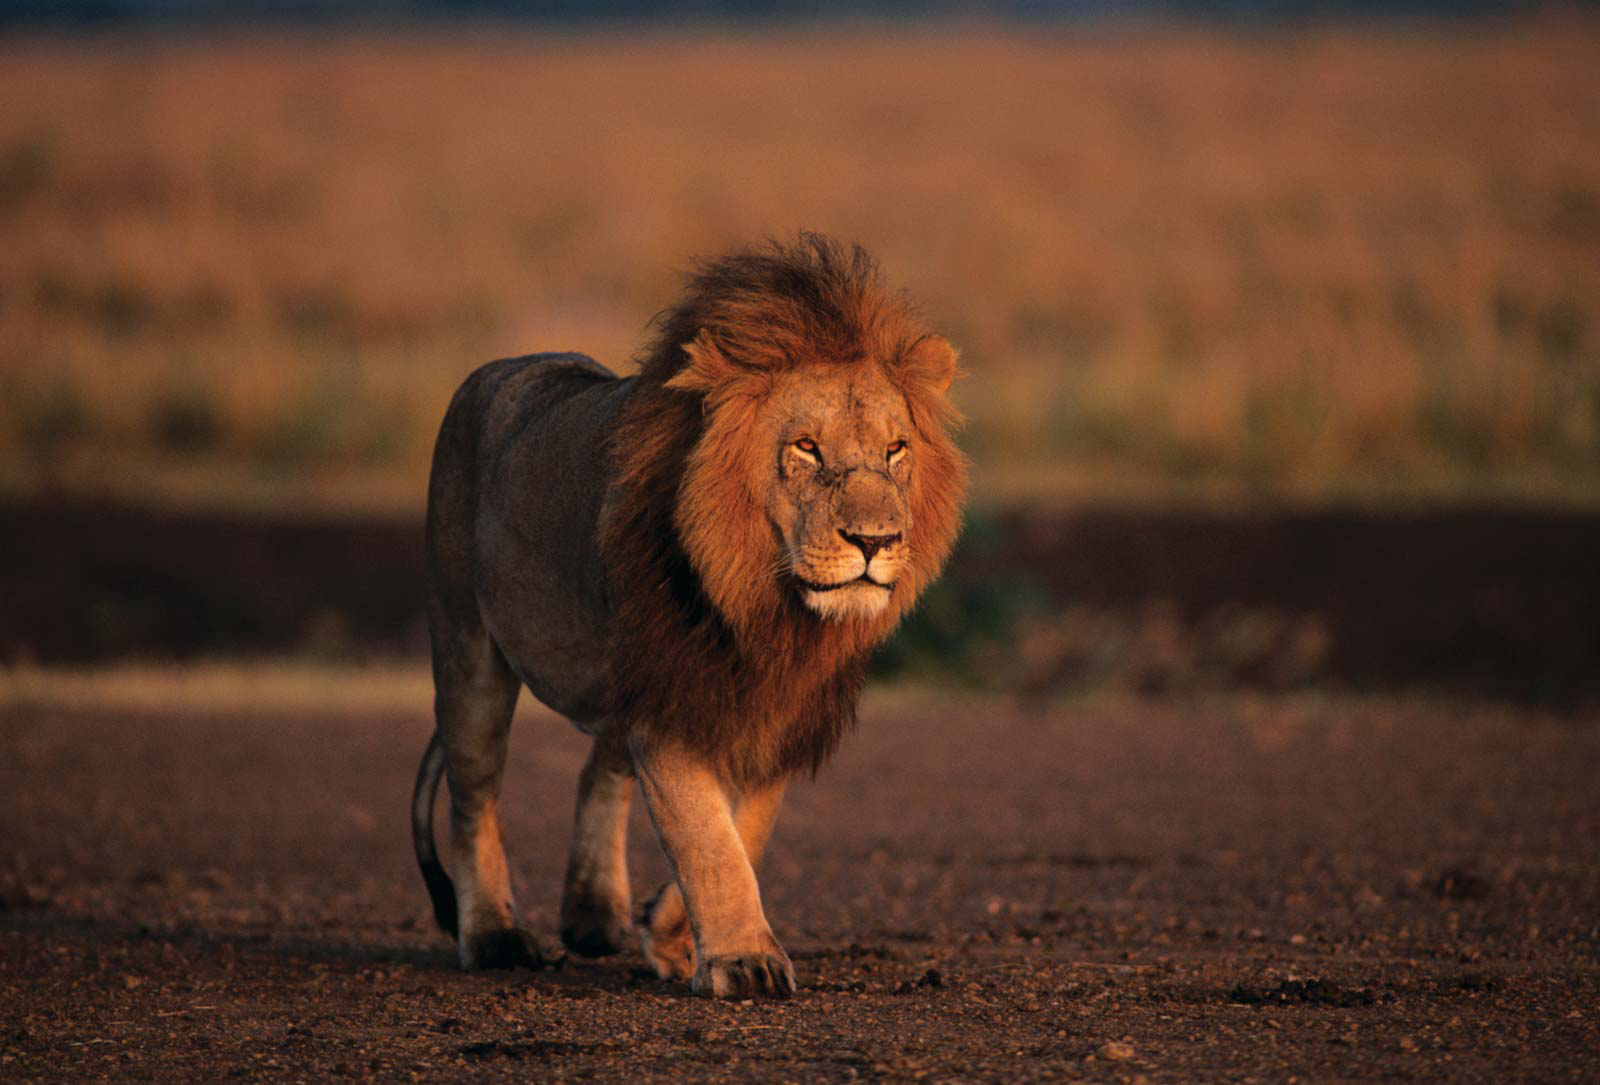

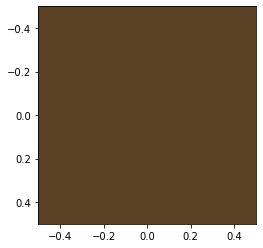

blue: 0.964315240531786
green: 0.8381246343651517
red: 0.7060675138414657
white: 1.306282691976423
black: 0.4607133862808273

Best Fitting Colour: black

Best Fitting Emotions: fear, elegance


In [42]:
PATH="/content/drive/MyDrive/1. MajorProject/DATASET/Images/lion.jpg"
image = Image.open(r"/content/drive/MyDrive/1. MajorProject/DATASET/Images/lion.jpg") 
display(image)

dominant_colors, major_colour = find_dominant_colours(PATH)
dominant_colors

emotion_list = colour_to_emotion(major_colour)
#emotion_list

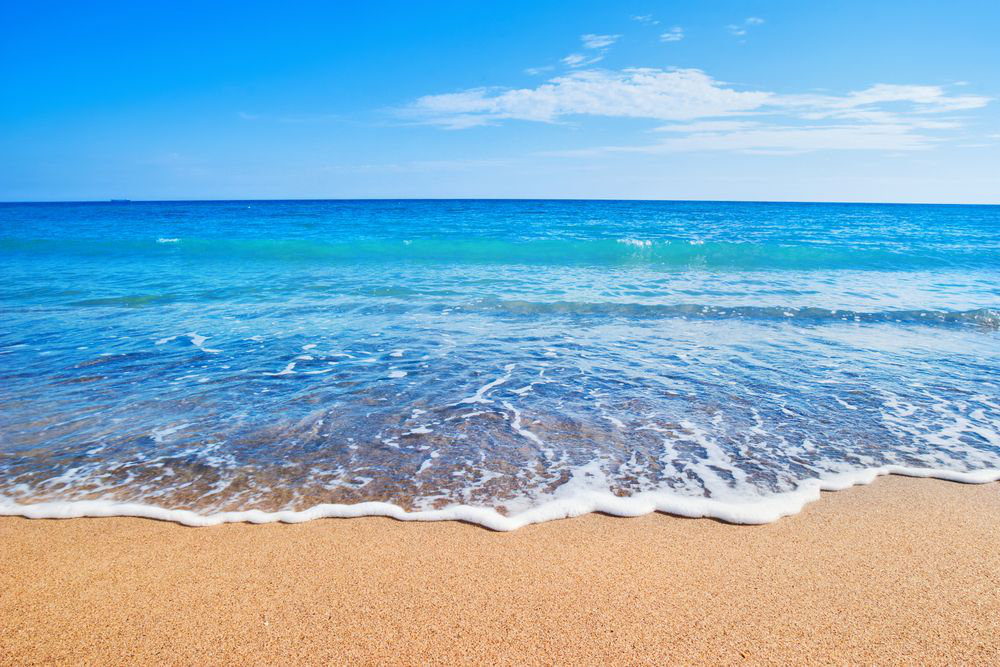

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


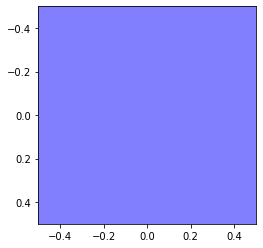

blue: 0.7161883814821967
green: 1.287642744314499
red: 1.2784734745864181
white: 0.7051521277428612
black: 1.2861190723872824

Best Fitting Colour: white

Best Fitting Emotions: pure, clean


In [44]:
PATH="/content/drive/MyDrive/1. MajorProject/DATASET/Images/beach.jpg"
image = Image.open(r"/content/drive/MyDrive/1. MajorProject/DATASET/Images/beach.jpg") 
display(image)

dominant_colors, major_colour = find_dominant_colours(PATH)
dominant_colors

emotion_list = colour_to_emotion(major_colour)
#emotion_list

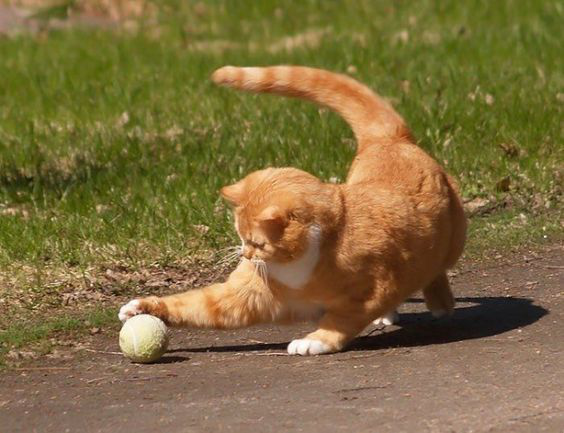

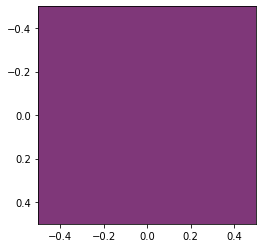

blue: 0.7554492541182805
green: 1.0432404489720457
red: 0.7236330230292523
white: 1.0692299075295777
black: 0.7209182917578132

Best Fitting Colour: black

Best Fitting Emotions: fear, elegance


In [41]:
PATH="/content/drive/MyDrive/1. MajorProject/DATASET/Images/cat_3.jpg"
image = Image.open(r"/content/drive/MyDrive/1. MajorProject/DATASET/Images/cat_3.jpg") 
display(image)

dominant_colors, major_colour = find_dominant_colours(PATH)
dominant_colors

emotion_list = colour_to_emotion(major_colour)
#emotion_list